<a href="https://colab.research.google.com/gist/qbeer/e52ec7f519dfc2fa12583fa3b497769d/hw12_no_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Word2Vec (something like that) embeddings

* Read the GloVE file into word - vector pairs
* Create a 2D-embedding with PCA for the 10_000 nearest neighbors (based on L2 distance) for the word 'dog'.
* Visualize the 2 dimensional embeddings on a plot and add text annotations to it
    * 'dog' should be red
    * only add the nearast 50 neighbors
    * add an alpha (.3) to the 10_000 points (too much to visualize well with text)

In [126]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
import tensorflow as tf

import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

In [2]:
data = []

with open("glove.6B.50d.txt","r") as file:
    for line in file:
        data.append(line.split())

In [3]:
header = ["word"]

header += ["vec" + str(i + 1) for i,e in enumerate(data[0][1:])]
# print(["vec" + i for i in ])

print(len(data))
print(header)

400000
['word', 'vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6', 'vec7', 'vec8', 'vec9', 'vec10', 'vec11', 'vec12', 'vec13', 'vec14', 'vec15', 'vec16', 'vec17', 'vec18', 'vec19', 'vec20', 'vec21', 'vec22', 'vec23', 'vec24', 'vec25', 'vec26', 'vec27', 'vec28', 'vec29', 'vec30', 'vec31', 'vec32', 'vec33', 'vec34', 'vec35', 'vec36', 'vec37', 'vec38', 'vec39', 'vec40', 'vec41', 'vec42', 'vec43', 'vec44', 'vec45', 'vec46', 'vec47', 'vec48', 'vec49', 'vec50']


In [4]:
df = pd.DataFrame(data,columns=header)
df

,word,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,...,vec41,vec42,vec43,vec44,vec45,vec46,vec47,vec48,vec49,vec50
0,the,0.418,0.24968,-0.41242,0.1217,0.34527,-0.044457,-0.49688,-0.17862,-0.00066023,...,-0.29871,-0.15749,-0.34758,-0.045637,-0.44251,0.18785,0.0027849,-0.18411,-0.11514,-0.78581
1,",",0.013441,0.23682,-0.16899,0.40951,0.63812,0.47709,-0.42852,-0.55641,-0.364,...,-0.080262,0.63003,0.32111,-0.46765,0.22786,0.36034,-0.37818,-0.56657,0.044691,0.30392
2,.,0.15164,0.30177,-0.16763,0.17684,0.31719,0.33973,-0.43478,-0.31086,-0.44999,...,-6.3681e-05,0.068987,0.087939,-0.10285,-0.13931,0.22314,-0.080803,-0.35652,0.016413,0.10216
3,of,0.70853,0.57088,-0.4716,0.18048,0.54449,0.72603,0.18157,-0.52393,0.10381,...,-0.34727,0.28483,0.075693,-0.062178,-0.38988,0.22902,-0.21617,-0.22562,-0.093918,-0.80375
4,to,0.68047,-0.039263,0.30186,-0.17792,0.42962,0.032246,-0.41376,0.13228,-0.29847,...,-0.094375,0.018324,0.21048,-0.03088,-0.19722,0.082279,-0.09434,-0.073297,-0.064699,-0.26044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,chanty,0.23204,0.025672,-0.70699,-0.045465,0.13989,-0.62807,0.72625,0.34108,0.44614,...,-0.095526,-0.29605,0.38567,0.13684,0.59331,-0.69486,0.1241,-0.18069,-0.2583,-0.039673
399996,kronik,-0.60921,-0.67218,0.23521,-0.11195,-0.46094,-0.0074616,0.25578,0.85632,0.055977,...,0.67205,-0.59822,-0.20259,0.39243,0.028873,0.030003,-0.10617,-0.11411,-0.24901,-0.12026
399997,rolonda,-0.51181,0.058706,1.0913,-0.55163,-0.10249,-0.1265,0.99503,0.079711,-0.16246,...,0.024747,0.20092,-1.0851,-0.13626,0.35052,-0.85891,0.067858,-0.25003,-1.125,1.5863
399998,zsombor,-0.75898,-0.47426,0.4737,0.7725,-0.78064,0.23233,0.046114,0.84014,0.24371,...,0.45439,-0.84254,0.1065,-0.059397,0.090449,0.30581,-0.61424,0.78954,-0.014116,0.6448


In [5]:
df.set_index('word', inplace=True)
df

,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,...,vec41,vec42,vec43,vec44,vec45,vec46,vec47,vec48,vec49,vec50
word,,,,,,,,,,,,,,,,,,,,,
the,0.418,0.24968,-0.41242,0.1217,0.34527,-0.044457,-0.49688,-0.17862,-0.00066023,-0.6566,...,-0.29871,-0.15749,-0.34758,-0.045637,-0.44251,0.18785,0.0027849,-0.18411,-0.11514,-0.78581
",",0.013441,0.23682,-0.16899,0.40951,0.63812,0.47709,-0.42852,-0.55641,-0.364,-0.23938,...,-0.080262,0.63003,0.32111,-0.46765,0.22786,0.36034,-0.37818,-0.56657,0.044691,0.30392
.,0.15164,0.30177,-0.16763,0.17684,0.31719,0.33973,-0.43478,-0.31086,-0.44999,-0.29486,...,-6.3681e-05,0.068987,0.087939,-0.10285,-0.13931,0.22314,-0.080803,-0.35652,0.016413,0.10216
of,0.70853,0.57088,-0.4716,0.18048,0.54449,0.72603,0.18157,-0.52393,0.10381,-0.17566,...,-0.34727,0.28483,0.075693,-0.062178,-0.38988,0.22902,-0.21617,-0.22562,-0.093918,-0.80375
to,0.68047,-0.039263,0.30186,-0.17792,0.42962,0.032246,-0.41376,0.13228,-0.29847,-0.085253,...,-0.094375,0.018324,0.21048,-0.03088,-0.19722,0.082279,-0.09434,-0.073297,-0.064699,-0.26044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chanty,0.23204,0.025672,-0.70699,-0.045465,0.13989,-0.62807,0.72625,0.34108,0.44614,0.16329,...,-0.095526,-0.29605,0.38567,0.13684,0.59331,-0.69486,0.1241,-0.18069,-0.2583,-0.039673
kronik,-0.60921,-0.67218,0.23521,-0.11195,-0.46094,-0.0074616,0.25578,0.85632,0.055977,-0.23792,...,0.67205,-0.59822,-0.20259,0.39243,0.028873,0.030003,-0.10617,-0.11411,-0.24901,-0.12026
rolonda,-0.51181,0.058706,1.0913,-0.55163,-0.10249,-0.1265,0.99503,0.079711,-0.16246,0.56488,...,0.024747,0.20092,-1.0851,-0.13626,0.35052,-0.85891,0.067858,-0.25003,-1.125,1.5863


In [20]:
df = df.astype(float)
df

In [ ]:
"""
Set the word and values
"""

WORD = "dog"
NEIGHBORS = 10000
POINTS_LIMIT = 50

In [22]:
def euc_distance(a,b):
    dist = np.linalg.norm(a-b)
    return dist

In [29]:
def get_nearest(df,word="dog",neighbors=10000):
    choosen_point = df.loc[word]
    df = df.loc[df.index != word]
    df["distance"] = df.progress_apply(lambda x: euc_distance(choosen_point.to_numpy(),np.array(x)),axis=1)
    df = df.sort_values(by="distance",ascending=True)[:neighbors]
    choosen_point["distance"] = 0 # the chosen point distance is 0 of course
    df = df.append(choosen_point)
    return df

In [30]:
dfs = get_nearest(df, word=WORD,neighbors=NEIGHBORS)
dfs

100%|██████████| 399999/399999 [00:14<00:00, 26804.89it/s]
/home/nosyfire/Desktop/school/Data_mining_and_machine_learning/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,...,vec42,vec43,vec44,vec45,vec46,vec47,vec48,vec49,vec50,distance
word,,,,,,,,,,,,,,,,,,,,,
cat,0.452810,-0.50108,-0.537140,-0.015697,0.22191,0.54602,-0.67301,-0.689100,0.63493,-0.197260,...,0.48138,-0.433520,0.69455,0.910430,-0.281730,0.41637,-1.260900,0.712780,0.237820,1.884603
dogs,0.662930,-0.96696,-0.143340,-0.756590,0.24905,0.22172,-0.94465,-0.381720,0.87649,-0.656290,...,-0.13567,0.453790,1.12450,1.659500,-0.433190,-0.17027,-0.685280,0.291510,0.046649,2.651527
puppy,0.117320,-0.55452,-0.713670,-0.896920,0.34190,0.79210,-1.21290,-0.611270,0.61918,-0.082836,...,-0.51216,-1.047900,0.47079,0.968730,-0.366820,0.18768,-0.555700,0.419830,0.499180,3.149688
rabbit,0.530490,-0.63657,-0.533140,-0.375420,0.28821,1.23740,-0.47467,-1.203700,0.58209,-0.551490,...,0.57285,-0.571110,0.10893,1.090200,-0.028394,0.78458,-0.973320,0.361240,-0.056677,3.181787
pet,0.888330,-0.27086,-0.023035,0.007195,0.21290,0.81885,-1.26210,-1.490600,1.24160,0.349460,...,0.22500,-0.090920,1.09200,1.437600,0.171240,-0.45396,-0.175770,1.192100,0.270260,3.228044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
crocodilian,0.890040,-0.56280,-0.604190,0.266540,0.53513,0.91473,0.35492,0.041596,0.43391,0.195870,...,-1.24050,0.483760,0.90404,0.522690,0.032961,0.33565,0.232690,0.119270,-0.523580,5.693601
overkill,-0.023012,-0.84643,-0.476110,-0.153090,-0.91712,-0.10196,1.09260,0.114280,-0.27053,1.184200,...,-0.14893,-0.387660,0.59052,0.117540,-0.064448,0.80743,0.698750,-0.572020,0.469900,5.693620
sis,0.577510,-0.15182,0.728660,-0.372660,-0.33784,-0.56414,0.36167,-0.310250,0.25398,-0.604130,...,-0.11953,-0.058085,-0.11177,0.179770,-0.619600,0.43389,-0.015818,0.053191,0.545390,5.693635


In [31]:
pca = PCA(2)
pca_transformed = pca.fit_transform(dfs)

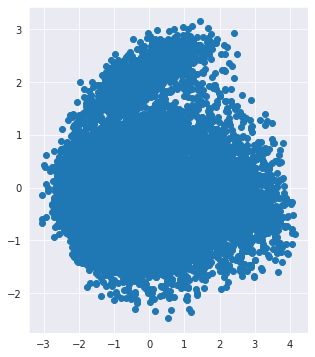

In [32]:
plt.figure(figsize=(17, 6))
plt.subplot(131)
plt.scatter(pca_transformed[:,0], pca_transformed[:,1])

In [34]:
pca_df = pd.DataFrame(pca_transformed)
pca_df.index = dfs.index.tolist()
pca_df

,0,1
cat,0.414558,-0.605821
dogs,0.947369,-1.556122
puppy,-1.015566,-0.477900
rabbit,-0.430874,-0.490525
pet,0.390386,-1.104632
...,...,...
crocodilian,-1.926106,-0.881978
overkill,-0.946473,-0.630606
sis,-0.869054,0.670578
skis,-0.276036,-1.365605


In [36]:
def my_plot(df, word="dog",points_limit=50):
    word_points = df.loc[word]
    best = df[:points_limit]
    limitedpoints = df[points_limit:]
    limitedpoints = limitedpoints[limitedpoints.index != word]

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))

    for index, row in best.iterrows():
        ax1.scatter(row[0], row[1], c="blue", s=150)
        ax1.text(row[0], row[1],index, fontsize=15)
    ax1.scatter(word_points[0],word_points[1], c="red", s=200)
    ax1.text(word_points[0], word_points[1],word, fontsize=15)
    # plt.show()

    ax2.scatter(limitedpoints[0], limitedpoints[1], c="blue", s=150,alpha=0.3)
    ax2.scatter(row[0], row[1], c="blue", s=150)
    ax2.scatter(word_points[0],word_points[1], c="red", s=200)
    plt.show()

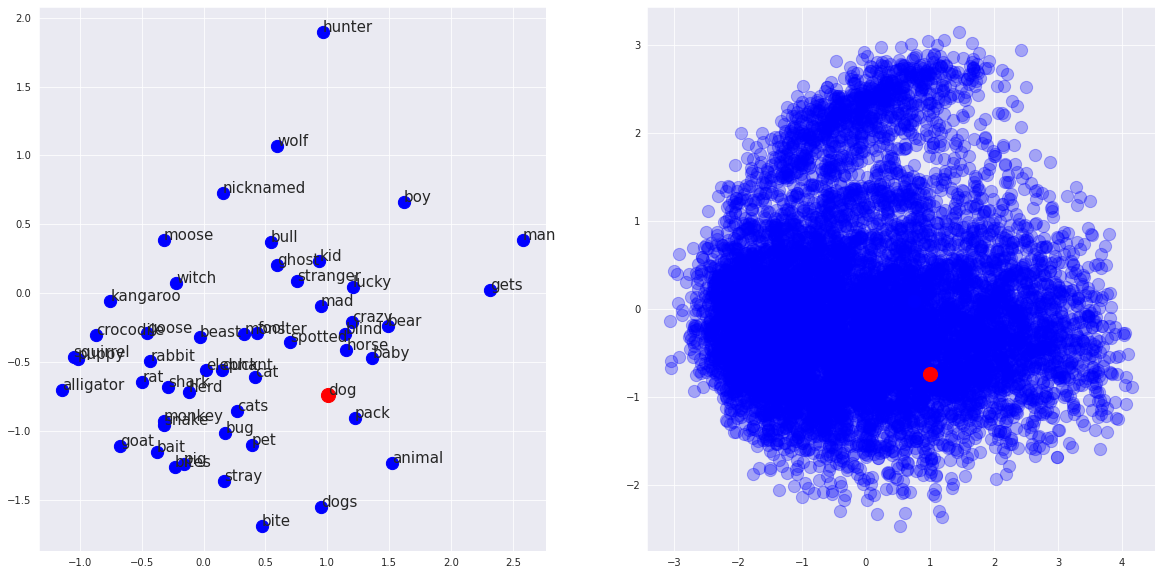

In [38]:
my_plot(pca_df, word=WORD,points_limit=POINTS_LIMIT)

## 2. IMDB reviews with word embeddings

Load the 'imdb_review' dataset from 'tf.keras.datasets.imdb' an convert each sentence into a sequence of its GloVe representations. This will generate (n_samples, sample_length, 50) dimensional dataset.

  * mean your input along the `sample_length` axis -> this generates a dataset useable to the MLP -> (n_samples, 50)
    * you are basically generating a mean representation of the sentence
  * handle your OOV (out of vocabulary) tokens with e.g. np.zeros(50) -> this does not influence the mean much

Loading the data:

  * `(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=None,
    skip_top=0,
    maxlen=150,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3
)`
  * do the preprocessing this way, this makes the dataset ~9'000 samples large and the maximum length is only 150 words
  * the dataset is represented as index values, so you need to convert twice: index -> word -> GloVe
    * the index-to-word conversion is achievable by Keras, read the documentation

Model defintion:
  * `Dense(256, relu)`,
  * `Dense(64, relu)`,
  * `Dense(1, sigmoid)`

Use default parameters in the compile: 'adam', 'binary_crossentropy', 'accuracy' metric. Train for 20-25 epochs.

***Hint: approximately 55-60% accuracy is achieveable on the test set.***## 2. IMDB reviews with word embeddings

Load the 'imdb_review' dataset from 'tf.keras.datasets.imdb' an convert each sentence into a sequence of its GloVe representations. This will generate (n_samples, sample_length, 50) dimensional dataset.

  * mean your input along the `sample_length` axis -> this generates a dataset useable to the MLP -> (n_samples, 50)
    * you are basically generating a mean representation of the sentence
  * handle your OOV (out of vocabulary) tokens with e.g. np.zeros(50) -> this does not influence the mean much

Loading the data:

  * `(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    path="imdb.npz",
    num_words=None,
    skip_top=0,
    maxlen=150,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3
)`
  * do the preprocessing this way, this makes the dataset ~9'000 samples large and the maximum length is only 150 words
  * the dataset is represented as index values, so you need to convert twice: index -> word -> GloVe
    * the index-to-word conversion is achievable by Keras, read the documentation

Model defintion:
  * `Dense(256, relu)`,
  * `Dense(64, relu)`,
  * `Dense(1, sigmoid)`

Use default parameters in the compile: 'adam', 'binary_crossentropy', 'accuracy' metric. Train for 20-25 epochs.

***Hint: approximately 55-60% accuracy is achieveable on the test set.***

In [206]:
import numpy as np

embeddings = {}

with open("glove.6B.50d.txt", "r") as f:
  for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings[word] = coefs

In [207]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(path="imdb.npz", num_words=None, skip_top=0, maxlen=150, seed=113, start_char=1, oov_char=2, index_from=3)

In [208]:
print(train_data[0])
print('label:', train_labels[0])

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 44076, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 51428, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]
label: 0


In [209]:
vocabulary = imdb.get_word_index()

In [210]:
index_word = {i: w for w, i in vocabulary.items()}

In [211]:
def decode_review(dataset,index_word):
    data = []
    for i in dataset:
          words = [index_word.get(idx, '[OOV]') for idx in i]
          glove = np.mean(np.vstack([embeddings.get(word, np.zeros(50)) for word in words]), axis=0)
          data.append(glove)
    return np.array(data)

In [212]:
x_train_glove = decode_review(x_train,index_word)
x_test_glove = decode_review(x_test,index_word)

In [213]:
print(x_train_glove.shape,x_test_glove.shape)

(9290, 50) (9704, 50)


In [248]:
model = keras.Sequential()

# model.add(keras.layers.Embedding(len(vocabulary), 2, input_length=256))
model.add(keras.layers.Dense(256, activation='relu', input_shape=(50,)))
# model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))

# dropout regularization
# model.add(keras.layers.Dropout(rate=0.5))

# model.add(keras.layers.Dense(5))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 256)               13056     
_________________________________________________________________
dense_47 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 65        
Total params: 29,569
Trainable params: 29,569
Non-trainable params: 0
_________________________________________________________________


In [249]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [250]:
history = model.fit(x_train_glove,
                    train_labels,
                    epochs=25,
                    batch_size=100,
                    validation_data=(x_test_glove, test_labels),
                    verbose=1)

Epoch 1/25
93/93 [==============================] - 1s 3ms/step - loss: 0.6905 - accuracy: 0.5307 - val_loss: 0.6899 - val_accuracy: 0.5164
Epoch 2/25
93/93 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5452 - val_loss: 0.6776 - val_accuracy: 0.5798
Epoch 3/25
93/93 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5812 - val_loss: 0.6720 - val_accuracy: 0.5823
Epoch 4/25
93/93 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5836 - val_loss: 0.6716 - val_accuracy: 0.5792
Epoch 5/25
93/93 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.5920 - val_loss: 0.6734 - val_accuracy: 0.5803
Epoch 6/25
93/93 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.5884 - val_loss: 0.6654 - val_accuracy: 0.6002
Epoch 7/25
93/93 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.5936 - val_loss: 0.6648 - val_accuracy: 0.6004
Epoch 8/25
93/93 [==

In [251]:
# import matplotlib.pyplot as plt
def plot_accuracy(history, miny=None):
  acc = history.history['accuracy']
  test_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.plot(epochs, acc)
  plt.plot(epochs, test_acc)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('accuracy')
  plt.xlabel('epoch')
  plt.figure()

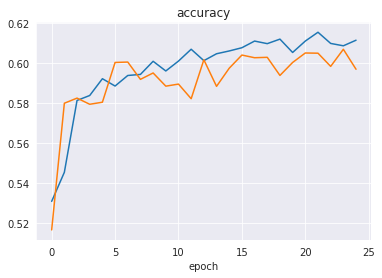

<Figure size 432x288 with 0 Axes>

In [252]:
plot_accuracy(history)


## 3. Sequence modeling with LSTM

  * use the IMDB dataset again converted into GloVe sequences but without the mean operation. This way you are going to generate (n_samples, sequence_length, 50) sample points with different sequence lengths
  * pad every sequence to `150` in length with np.zeros(50) -> (n_samples, 150, 50)
  * LSTM is a recurrent model with intricate inner operations, if you use it in a bideractional fashion, your sequence will be processed from both ends

Model definition:
  * `BidirectionalLSTM(64, return_sequences=True),`
  * `BidirectionalLSTM(64),`
  * `Dense(64, relu)`,
  * `Dense(1, sigmoid)`

Use default parameters in the compile: 'adam', 'binary_crossentropy', 'accuracy' metric. Train for 20-25 epochs.

***Hint: approximately 65-70% accuracy is achieveable on the test set.***

In [254]:
MAX_LEN = 150

In [255]:
def decode_plus_dimension(dataset,index_word,max_len):
    data = []
    for i in dataset:
        words = [index_word.get(idx, '[OOV]') for idx in i]
        if len(words) > max_len:
            words = words[:max_len]
        else:
            words.extend(['[PAD]' for _ in range(max_len - len(words))])
        glove = np.vstack([embeddings.get(word, np.zeros(50)) for word in words])
        data.append(glove)

    return np.array(data)

In [257]:
x_train_glove = decode_plus_dimension(x_train,index_word,MAX_LEN)
x_test_glove = decode_plus_dimension(x_test,index_word,MAX_LEN)
print(x_train_glove.shape, x_test_glove.shape)

(9290, 150, 50) (9704, 150, 50)


In [267]:
# Input for variable-length sequences of integers
model_lstm = keras.models.Sequential()

model_lstm.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(150, 50)))
model_lstm.add(keras.layers.Bidirectional(keras.layers.LSTM(64)))
model_lstm.add(keras.layers.Dense(64,activation="relu"))
model_lstm.add(keras.layers.Dense(1, activation="sigmoid"))
model_lstm.summary()
model_lstm.compile("adam", "binary_crossentropy", metrics=["accuracy"])


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_16 (Bidirectio (None, 150, 128)          58880     
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dense_55 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 65        
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [268]:
history_lstm = model.fit(x_train_glove, train_labels, batch_size=32, epochs=20, validation_data=(x_test_glove, test_labels))

Epoch 1/20
291/291 [==============================] - 51s 156ms/step - loss: 0.6934 - accuracy: 0.5140 - val_loss: 0.6864 - val_accuracy: 0.5500
Epoch 2/20
291/291 [==============================] - 43s 148ms/step - loss: 0.6852 - accuracy: 0.5555 - val_loss: 0.6768 - val_accuracy: 0.5769
Epoch 3/20
291/291 [==============================] - 44s 151ms/step - loss: 0.6808 - accuracy: 0.5582 - val_loss: 0.7035 - val_accuracy: 0.4886
Epoch 4/20
291/291 [==============================] - 43s 146ms/step - loss: 0.6797 - accuracy: 0.5611 - val_loss: 0.6772 - val_accuracy: 0.5766
Epoch 5/20
291/291 [==============================] - 42s 146ms/step - loss: 0.6556 - accuracy: 0.6068 - val_loss: 0.6472 - val_accuracy: 0.6341
Epoch 6/20
291/291 [==============================] - 42s 144ms/step - loss: 0.6268 - accuracy: 0.6524 - val_loss: 0.6276 - val_accuracy: 0.6413
Epoch 7/20
291/291 [==============================] - 42s 145ms/step - loss: 0.5920 - accuracy: 0.6865 - val_loss: 0.6028 - val_ac

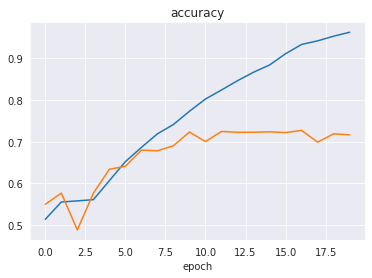

<Figure size 432x288 with 0 Axes>

In [269]:
plot_accuracy(history_lstm)